In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter
import zipfile
from PIL import Image
import pandas as pd
import seaborn as sns

# EDA

## Count Images per Folder

In [ ]:
# zip_file_path = '/content/drive/MyDrive/GDP Labs Test/fruit_color.zip'
# extract_dir = '/content/drive/MyDrive/GDP Labs Test/extracted_data/'

# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_dir)



Counter({'fruit_color': 1})


In [ ]:
# extract_dir = '/content/drive/MyDrive/GDP Labs Test/extracted_data/fruit_color/'
# folder_counts = {}

# for folder in os.listdir(extract_dir):
#     folder_path = os.path.join(extract_dir, folder)
#     if os.path.isdir(folder_path):  # Ensure we're counting inside directories only
#         image_count = len([file for file in os.listdir(folder_path) if file.endswith(('.png', '.jpg', '.jpeg'))])
#         folder_counts[folder] = image_count

# print(folder_counts)

{'Apple Green': 1954, 'Apple Red': 3789, 'Apple Yellow': 640, 'Avocado Black': 657, 'Avocado Green': 570, 'Banana Red': 656, 'Banana Yellow': 1258, 'Cherry Black': 429, 'Cherry Red': 3280, 'Cherry Yellow': 656, 'Corn Green': 616, 'Corn Yellow': 600, 'Grape Blue': 1312, 'Grape Green': 1941, 'Grape Red': 656, 'Lemon Orange': 656, 'Lemon Yellow': 656, 'Mandarine Orange': 656, 'Mango Green': 656, 'Mango Red': 568, 'Onion Red': 1195, 'Onion White': 584, 'Orange Orange': 639, 'Peach Orange': 656, 'Peach Yellow': 984, 'Pear Brown': 1058, 'Pear Green': 656, 'Pear Red': 888, 'Pear Yellow': 656, 'Pepper Green': 592, 'Pepper Orange': 936, 'Pepper Red': 888, 'Pepper Yellow': 888, 'Pineapple Brown': 656, 'Pineapple Orange': 656, 'Potato Brown': 1200, 'Potato Red': 1204, 'Strawberry Red': 1640, 'Tomato Green': 632, 'Tomato Red': 5566, 'Tomato Yellow': 612}


## Display Image

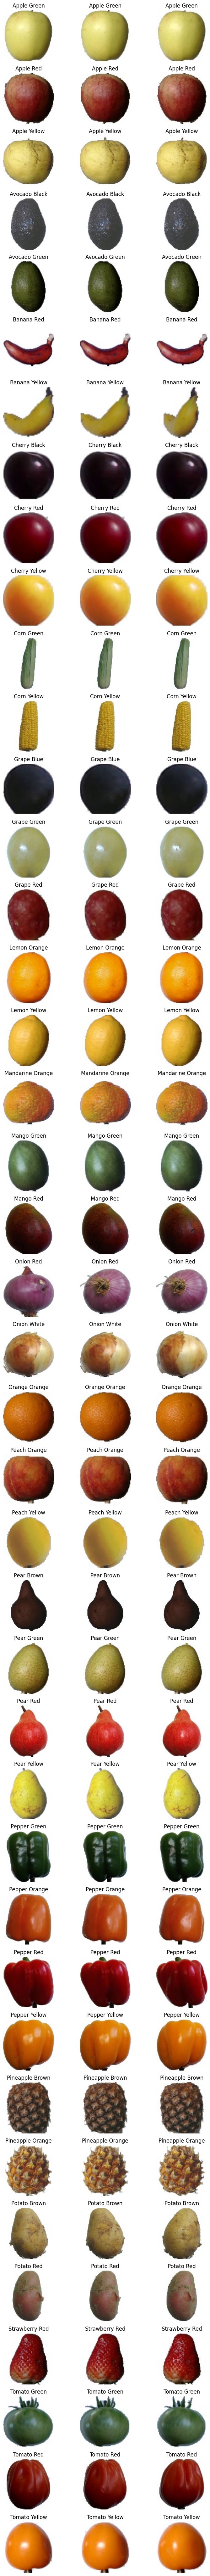

In [ ]:
extract_dir = '/content/drive/MyDrive/GDP Labs Test/extracted_data/fruit_color/'

folders = os.listdir(extract_dir)
images_per_folder = 3

plt.figure(figsize=(8, len(folders) * 2))

image_count = 1
for folder_name in folders:
    folder_path = os.path.join(extract_dir, folder_name)

    if os.path.isdir(folder_path):
        images = [file for file in os.listdir(folder_path) if file.endswith(('.png', '.jpg', '.jpeg'))]

        for img_name in images[:images_per_folder]:
            img_path = os.path.join(folder_path, img_name)
            img = Image.open(img_path)

            plt.subplot(len(folders), images_per_folder, image_count)
            plt.imshow(img)
            plt.axis('off')
            plt.title(folder_name)
            image_count += 1

plt.tight_layout()
plt.show()


## Class Distribution Visualization

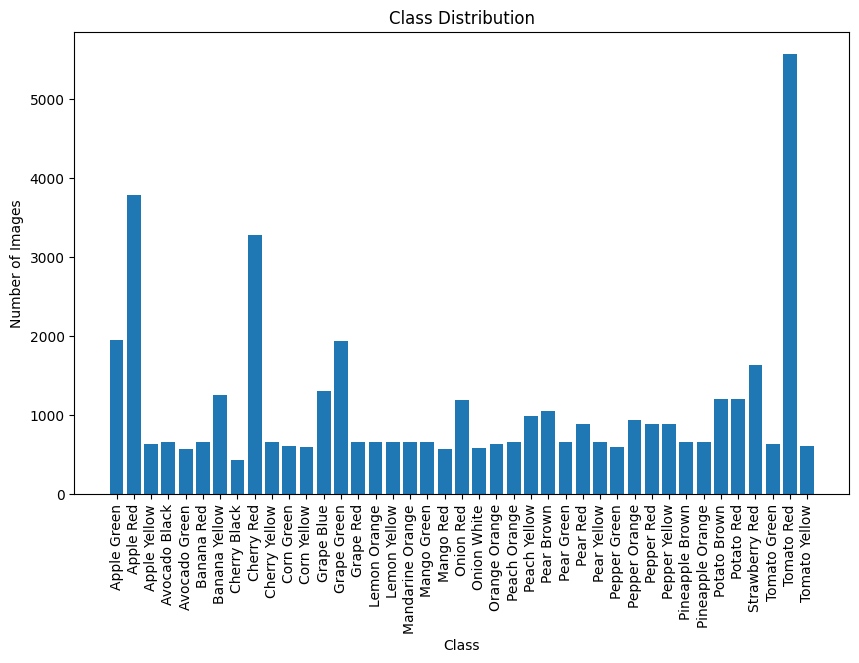

In [ ]:
import matplotlib.pyplot as plt

class_counts = {folder: len(os.listdir(os.path.join(extract_dir, folder))) for folder in folders if os.path.isdir(os.path.join(extract_dir, folder))}

plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=90)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.show()


## Image Size Distribution

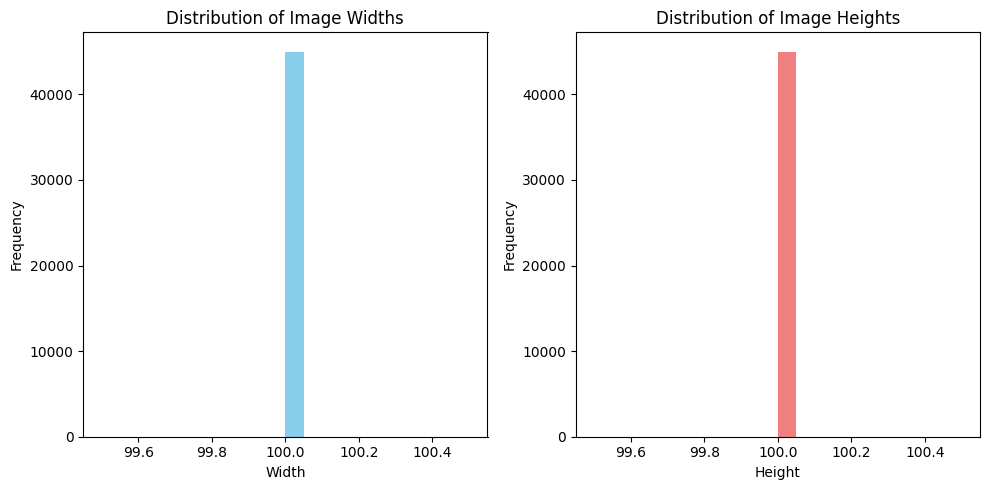

In [ ]:
from PIL import Image

image_sizes = []
for folder_name in folders:
    folder_path = os.path.join(extract_dir, folder_name)
    if os.path.isdir(folder_path):
        for img_name in os.listdir(folder_path):
            if img_name.endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(folder_path, img_name)
                img = Image.open(img_path)
                image_sizes.append(img.size)

widths, heights = zip(*image_sizes)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=20, color='skyblue')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.title('Distribution of Image Widths')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=20, color='lightcoral')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Distribution of Image Heights')

plt.tight_layout()
plt.show()


## Image Brightness and Contrast Analysis

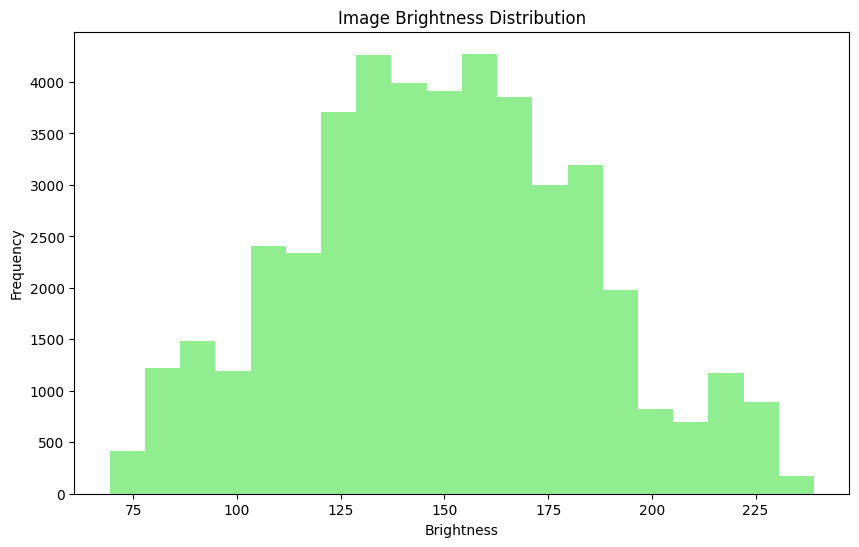

In [ ]:
from PIL import ImageStat

extract_dir = '/content/drive/MyDrive/GDP Labs Test/extracted_data/fruit_color/'
folders = os.listdir(extract_dir)
def get_brightness(image):
    stat = ImageStat.Stat(image)
    return stat.mean[0]  # Brightness is the mean of pixel intensity values

brightness_values = []
for folder_name in folders:
    folder_path = os.path.join(extract_dir, folder_name)
    if os.path.isdir(folder_path):
        for img_name in os.listdir(folder_path):
            if img_name.endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(folder_path, img_name)
                img = Image.open(img_path).convert('L')  # Convert to grayscale for brightness analysis
                brightness_values.append(get_brightness(img))

plt.figure(figsize=(10, 6))
plt.hist(brightness_values, bins=20, color='lightgreen')
plt.xlabel('Brightness')
plt.ylabel('Frequency')
plt.title('Image Brightness Distribution')
plt.show()


## Fruits Type Label Distribution

In [ ]:
data = []
folders = os.listdir(extract_dir)

# Loop through the folder names
for folder in folders:
    folder_path = os.path.join(extract_dir, folder)
    # print(folder_path)
    if os.path.isdir(folder_path):
        # Split folder name to get fruit type and color
        fruit_type, fruit_color = folder.split(' ')

        # Add to data list
        data.append([fruit_type, fruit_color])

# Convert to pandas DataFrame
df = pd.DataFrame(data, columns=['fruit_type', 'fruit_color'])

# Display first few rows to ensure the DataFrame is correct
print(df.head())

  fruit_type fruit_color
0      Apple       Green
1      Apple         Red
2      Apple      Yellow
3    Avocado       Black
4    Avocado       Green


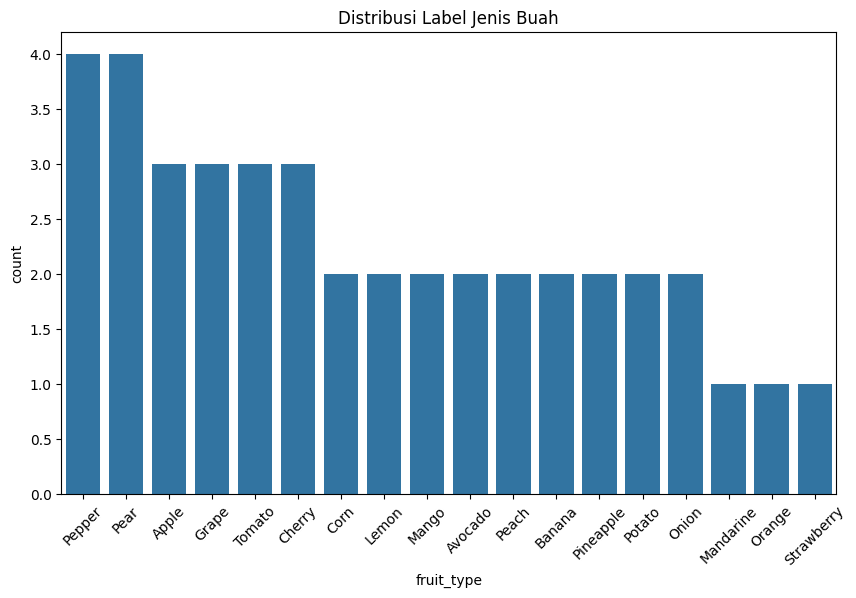

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='fruit_type', order=df['fruit_type'].value_counts().index)
plt.title('Distribusi Label Jenis Buah')
plt.xticks(rotation=45)
plt.show()

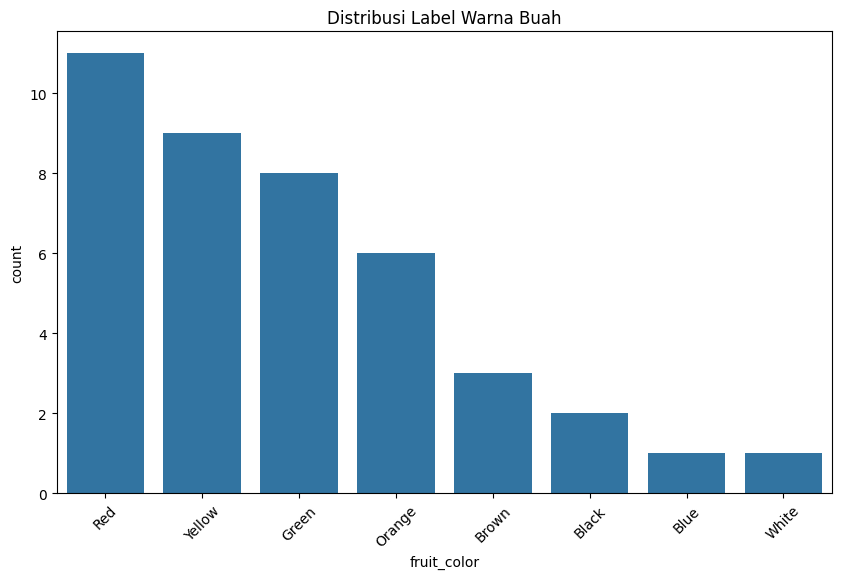

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='fruit_color', order=df['fruit_color'].value_counts().index)
plt.title('Distribusi Label Warna Buah')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# List to store image paths, labels, and the number of images per folder
data = []

# Loop through the folder names
for folder in os.listdir(extract_dir):
    folder_path = os.path.join(extract_dir, folder)
    if os.path.isdir(folder_path):
        # Split folder name to get fruit type and color
        fruit_type, fruit_color = folder.split(' ')

        # Count the number of images in the folder
        num_images = len([img for img in os.listdir(folder_path) if img.endswith('.jpg')])

        # Add to data list
        data.append([fruit_type, fruit_color, num_images])

# Convert to pandas DataFrame
df = pd.DataFrame(data, columns=['fruit_type', 'fruit_color', 'num_images'])

# Display first few rows to ensure the DataFrame is correct
print(df.head())


  fruit_type fruit_color  num_images
0      Apple       Green        1954
1      Apple         Red        3789
2      Apple      Yellow         640
3    Avocado       Black         657
4    Avocado       Green         570


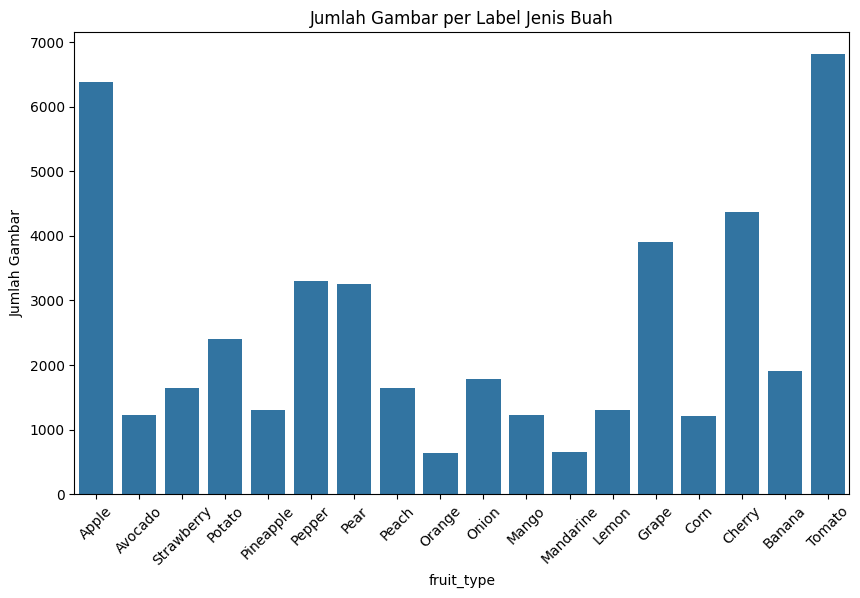

In [ ]:
# Group by fruit_type to sum the number of images per fruit type
df_fruit_type = df.groupby('fruit_type')['num_images'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_fruit_type, x='fruit_type', y='num_images', order=df_fruit_type['fruit_type'].value_counts().index)
plt.title('Jumlah Gambar per Label Jenis Buah')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Gambar')
plt.show()


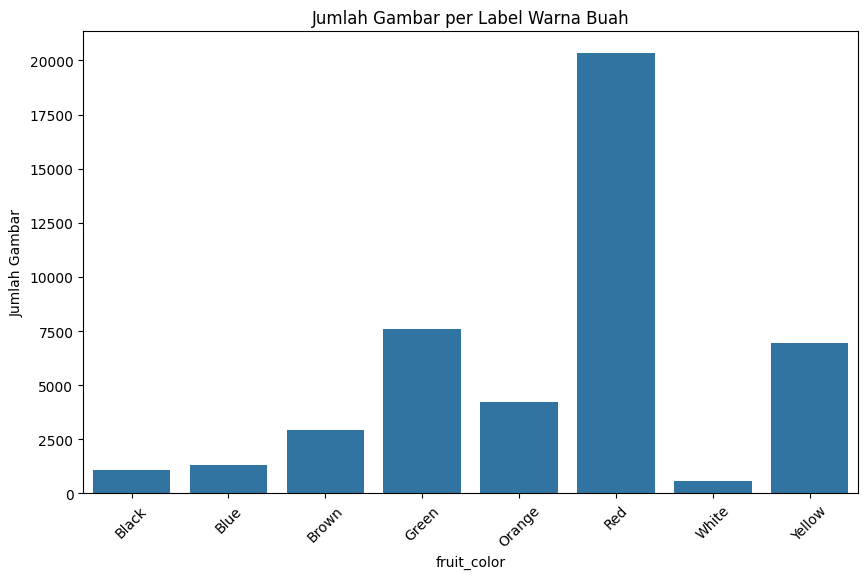

In [ ]:
# Group by fruit_color to sum the number of images per fruit color
df_fruit_color = df.groupby('fruit_color')['num_images'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_fruit_color, x='fruit_color', y='num_images', order=df_fruit_color['fruit_color'].value_counts().index)
plt.title('Jumlah Gambar per Label Warna Buah')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Gambar')
plt.show()


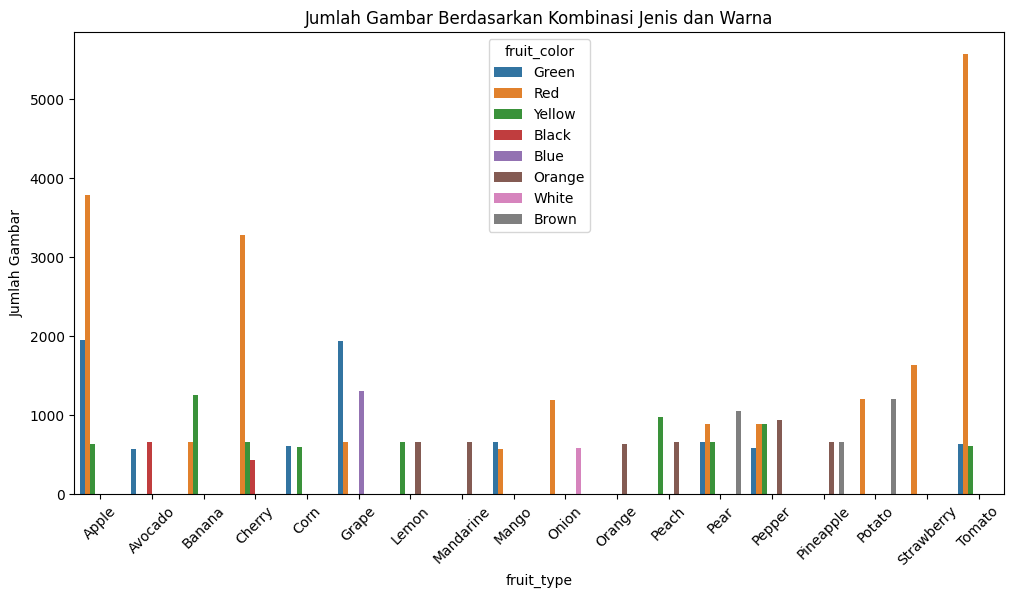

In [ ]:
# Group by both fruit_type and fruit_color
df_combined = df.groupby(['fruit_type', 'fruit_color'])['num_images'].sum().reset_index()

# Plot combined label distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=df_combined, x='fruit_type', y='num_images', hue='fruit_color')
plt.title('Jumlah Gambar Berdasarkan Kombinasi Jenis dan Warna')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Gambar')
plt.show()


fruit_color  Black  Blue  Brown  Green  Orange   Red  White  Yellow
fruit_type                                                         
Apple            0     0      0   1954       0  3789      0     640
Avocado        657     0      0    570       0     0      0       0
Banana           0     0      0      0       0   656      0    1258
Cherry         429     0      0      0       0  3280      0     656
Corn             0     0      0    616       0     0      0     600
Grape            0  1312      0   1941       0   656      0       0
Lemon            0     0      0      0     656     0      0     656
Mandarine        0     0      0      0     656     0      0       0
Mango            0     0      0    656       0   568      0       0
Onion            0     0      0      0       0  1195    584       0
Orange           0     0      0      0     639     0      0       0
Peach            0     0      0      0     656     0      0     984
Pear             0     0   1058    656       0  

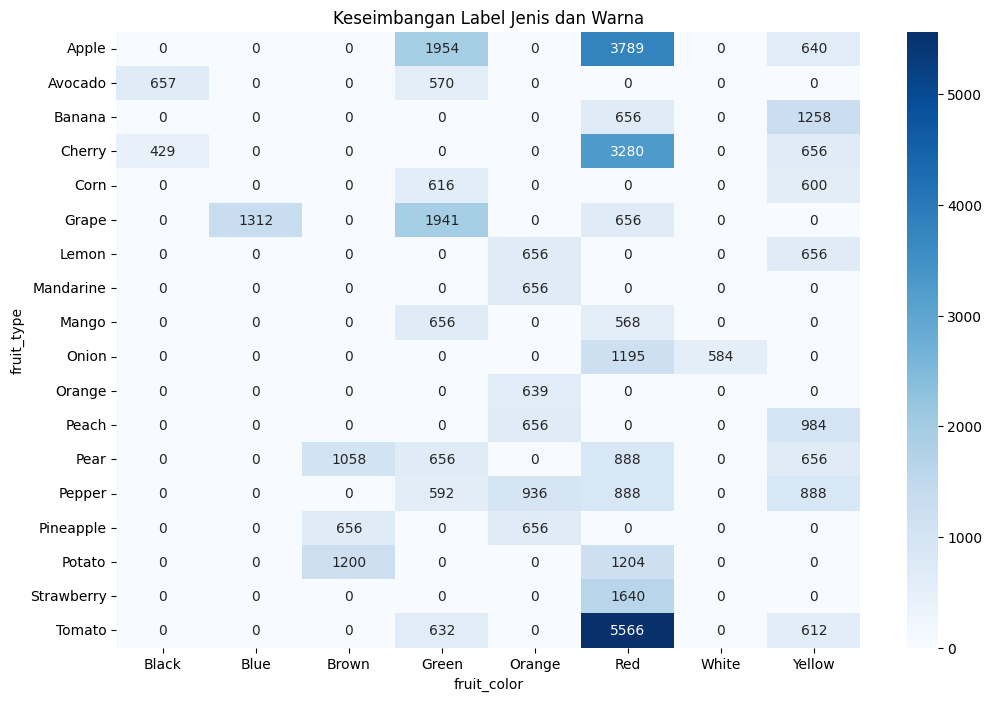

In [ ]:
# Cross-tabulation of fruit_type and fruit_color
label_balance = pd.crosstab(df['fruit_type'], df['fruit_color'])
print(label_balance)

# Visualize the balance using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(label_balance, annot=True, cmap='Blues', fmt='d')
plt.title('Keseimbangan Label Jenis dan Warna')
plt.show()


# Preprocessing

In [ ]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


## Create Dataframe path Image

In [ ]:
# List to store image paths, labels, and the number of images per folder
data = []
extract_dir = '/content/drive/MyDrive/GDP Labs Test/extracted_data/fruit_color/'
# Loop through the folder names
for folder in os.listdir(extract_dir):
    folder_path = os.path.join(extract_dir, folder)
    if os.path.isdir(folder_path):
        # Split folder name to get fruit type and color
        fruit_type, fruit_color = folder.split(' ')

        # Loop through images in the folder
        for img in os.listdir(folder_path):
            if img.endswith('.jpg'):
                # Get full image path
                img_path = os.path.join(folder_path, img)

                # Append to data list
                data.append([img_path, fruit_type, fruit_color])

# Convert to pandas DataFrame
df = pd.DataFrame(data, columns=['image_path', 'fruit_type', 'fruit_color'])

# Display first few rows to ensure the DataFrame is correct
print(df.head())

# df.to_csv('/content/drive/MyDrive/GDP Labs Test/extracted_data/fruit_color/fruits-output.csv', index=False)

                                          image_path fruit_type fruit_color
0  /content/drive/MyDrive/GDP Labs Test/extracted...      Apple       Green
1  /content/drive/MyDrive/GDP Labs Test/extracted...      Apple       Green
2  /content/drive/MyDrive/GDP Labs Test/extracted...      Apple       Green
3  /content/drive/MyDrive/GDP Labs Test/extracted...      Apple       Green
4  /content/drive/MyDrive/GDP Labs Test/extracted...      Apple       Green


## Resizing to 224x224, Augmented & SPlitting Image

In [ ]:
class_labels = df['fruit_type'].unique().tolist()
color_labels = df['fruit_color'].unique().tolist()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2, # Shift horizontally
    height_shift_range=0.2, # Shift vertically
    shear_range=0.2,       # Shear intensity
    zoom_range=0.2,
    horizontal_flip=True,  # Randomly flip images
    fill_mode='nearest'
  )

train_generator = datagen.flow_from_directory(
    extract_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode=None,  # Hindari penanganan label oleh ImageDataGenerator
    subset='training',
    shuffle=True,
    seed=42
)

val_generator = datagen.flow_from_directory(
    extract_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode=None,  # Hindari penanganan label oleh ImageDataGenerator
    subset='validation',
    shuffle=True,
    seed=42
)


def custom_label_encoder(folder_name, class_labels, color_labels):
    class_name, color_name = folder_name.split()

    class_encoding = [1 if class_name == c else 0 for c in class_labels]
    color_encoding = [1 if color_name == co else 0 for co in color_labels]

    # print(f'class_encoding dtype: {np.array(class_encoding).dtype}, color_encoding dtype: {np.array(color_encoding).dtype}')

    return np.array(class_encoding), np.array(color_encoding)

def custom_generator(generator, class_labels, color_labels):
    while True:
        batch_x, batch_filenames = next(generator), generator.filenames[:generator.batch_size]

        batch_fruit_labels = []
        batch_color_labels = []

        for file_path in batch_filenames:
            fruit_label, color_label = custom_label_encoder(os.path.basename(os.path.dirname(file_path)), class_labels, color_labels)
            batch_fruit_labels.append(fruit_label)
            batch_color_labels.append(color_label)

        batch_fruit_labels = np.array(batch_fruit_labels)
        batch_color_labels = np.array(batch_color_labels)
        yield batch_x, {'fruit_type_output': batch_fruit_labels, 'color_output': batch_color_labels}


train_data = custom_generator(train_generator, class_labels, color_labels)
val_data = custom_generator(val_generator, class_labels, color_labels)


Found 36008 images belonging to 41 classes.
Found 8984 images belonging to 41 classes.


# Create Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, roc_auc_score

## Use Model ResNet50

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Add Custom Layers for Multi-Label Classification

In [ ]:
num_fruit_types = len(class_labels)
num_colors = len(color_labels)

In [ ]:
print(num_colors)

8


In [ ]:

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Fully connected layer dengan ReLU

# Multi-label classification: dua output, satu untuk fruit type dan satu untuk color
output_type = Dense(num_fruit_types, activation='sigmoid', name='fruit_type_output')(x)
output_color = Dense(num_colors, activation='sigmoid', name='color_output')(x)

# Definisikan model
model = Model(inputs=base_model.input, outputs=[output_type, output_color])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 25,712,538 (98.09 MB)

 Trainable params: 2,124,826 (8.11 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Compile model dengan binary_crossentropy
model.compile(
    optimizer='adam',
    loss={'fruit_type_output': 'binary_crossentropy', 'color_output': 'binary_crossentropy'},
    metrics={'fruit_type_output': 'accuracy', 'color_output': 'accuracy'}
)


In [ ]:
# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Save the model in .keras format
checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/GDP Labs Test/best_model.keras',
    monitor='val_loss',
    save_best_only=True
)

# Combine callbacks
callbacks = [early_stopping, checkpoint]


In [ ]:
print(train_generator.class_indices)  # Check class labels and indices
print(len(train_generator.class_indices))

print(train_data)

{'Apple Green': 0, 'Apple Red': 1, 'Apple Yellow': 2, 'Avocado Black': 3, 'Avocado Green': 4, 'Banana Red': 5, 'Banana Yellow': 6, 'Cherry Black': 7, 'Cherry Red': 8, 'Cherry Yellow': 9, 'Corn Green': 10, 'Corn Yellow': 11, 'Grape Blue': 12, 'Grape Green': 13, 'Grape Red': 14, 'Lemon Orange': 15, 'Lemon Yellow': 16, 'Mandarine Orange': 17, 'Mango Green': 18, 'Mango Red': 19, 'Onion Red': 20, 'Onion White': 21, 'Orange Orange': 22, 'Peach Orange': 23, 'Peach Yellow': 24, 'Pear Brown': 25, 'Pear Green': 26, 'Pear Red': 27, 'Pear Yellow': 28, 'Pepper Green': 29, 'Pepper Orange': 30, 'Pepper Red': 31, 'Pepper Yellow': 32, 'Pineapple Brown': 33, 'Pineapple Orange': 34, 'Potato Brown': 35, 'Potato Red': 36, 'Strawberry Red': 37, 'Tomato Green': 38, 'Tomato Red': 39, 'Tomato Yellow': 40}
41
<generator object custom_generator at 0x7cdb5c10edc0>


In [ ]:
# Ensure eager execution mode
tf.config.run_functions_eagerly(True)

# Melatih model

train_steps = int(len(train_generator.filenames) // BATCH_SIZE)
val_steps = int(len(val_generator.filenames) // BATCH_SIZE)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=1,
    steps_per_epoch=train_steps,
    validation_steps=val_steps,
    callbacks=callbacks
)



/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


 713/1125 ━━━━━━━━━━━━━━━━━━━━ 2:38:46 23s/step - color_output_accuracy: 1.0000 - fruit_type_output_accuracy: 1.0000 - loss: 4.2185e-09

# Evaluation

In [ ]:
val_steps = np.ceil(len(val_generator.filenames) / BATCH_SIZE).astype(int)

y_true_fruit = []
y_true_color = []
y_pred_fruit = []
y_pred_color = []

for i in range(val_steps):
    x_val, y_true = next(val_data)
    y_pred = model.predict(x_val)

    y_true_fruit.extend(y_true['fruit_type_output'])
    y_true_color.extend(y_true['color_output'])

    y_pred_fruit.extend(y_pred[0])
    y_pred_color.extend(y_pred[1])

y_true_fruit = np.array(y_true_fruit)
y_true_color = np.array(y_true_color)
y_pred_fruit = np.array(y_pred_fruit)
y_pred_color = np.array(y_pred_color)

y_pred_fruit = (y_pred_fruit > 0.5).astype(int)
y_pred_color = (y_pred_color > 0.5).astype(int)

print("Fruit Type Classification Report:")
print(classification_report(y_true_fruit, y_pred_fruit, target_names=class_labels))

print("\nFruit Color Classification Report:")
print(classification_report(y_true_color, y_pred_color, target_names=color_labels))


# Prediction

In [ ]:
x_val, y_true = next(val_data)
y_pred = model.predict(x_val)

y_pred_fruit = (y_pred[0] > 0.5).astype(int)
y_pred_color = (y_pred[1] > 0.5).astype(int)

fig, axs = plt.subplots(2, 5, figsize=(20, 10))

for i in range(10):
    ax = axs[i // 5, i % 5]

    ax.imshow(x_val[i])
    ax.axis('off')

    true_fruit = [class_labels[j] for j in range(len(class_labels)) if y_true['fruit_type_output'][i][j] == 1]
    true_color = [color_labels[j] for j in range(len(color_labels)) if y_true['color_output'][i][j] == 1]

    pred_fruit = [class_labels[j] for j in range(len(class_labels)) if y_pred_fruit[i][j] == 1]
    pred_color = [color_labels[j] for j in range(len(color_labels)) if y_pred_color[i][j] == 1]

    ax.set_title(f"True: {true_fruit[0]} ({true_color[0]})\nPred: {pred_fruit[0]} ({pred_color[0]})", fontsize=12)

plt.tight_layout()
plt.show()